In [13]:
%matplotlib widget
from easydynamics.analysis import Analysis


from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel
from easydynamics.sample import DeltaFunctionComponent

from easydynamics.experiment  import Experiment



from easydynamics.job import Job
from easydynamics.experiment  import Data


In [14]:
MyJob= Job(name='Vanadium sample')

theory= SampleModel('Vanadium Model')
theory.add_component(GaussianComponent(width=0.5e-3,area=5e-5))
theory.add_component(LorentzianComponent(width=2e-3, area=2e-6))

MyJob.set_theory(theory)

experiment=Experiment('Vanadium Experiment')

background=SampleModel('Vanadium Background')
background.add_component(PolynomialComponent(coefficients=[1e-3]))

experiment.set_background_model(background)

experiment.set_resolution_model(None)


data=Data('Vanadium Data')
data.append(data.load_example_vanadium_data_1d())

experiment.set_data(data)

MyJob.set_experiment(experiment)


analysis=Analysis('Vanadium Analysis')

MyJob.set_analysis(analysis)

In [15]:
MyJob.fit()

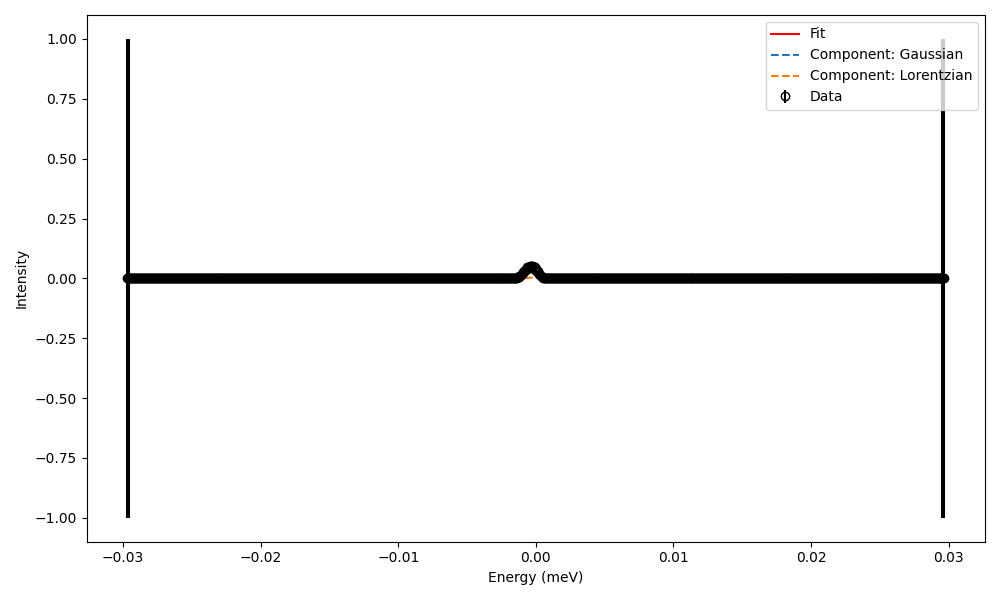

(0.0, 0.07)

In [16]:
fig=MyJob.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.07)

In [17]:
pars=MyJob.analysis.get_parameters()
pars

[<Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianarea': 0.0001 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Gaussiancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianwidth': 0.0004 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentzianarea': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0005 ± 0.0004 meV, bounds=[0.0:inf]>,
 <Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Polynomial_c0': 0.0002 ± 0.0000, bounds=[-inf:inf]>,
 <Parameter 'offset': -0.0004 ± 0.0000 meV, bounds=[-inf:inf]>]

In [18]:
DataJob= Job(name='Sample')

Newtheory= SampleModel('Model')
Newtheory.add_component(DeltaFunctionComponent(area=0.01e-3))
Newtheory.add_component(LorentzianComponent(width=2e-3, area=5e-6))

DataJob.set_theory(Newtheory)

Newexperiment=Experiment('Experiment')

Newbackground=SampleModel('Background')
Newbackground.add_component(PolynomialComponent(coefficients=[1e-3]))

Newexperiment.set_background_model(Newbackground)

res=SampleModel('Resolution')

theory_width=pars[3].value
theory_area=pars[1].value
theory_G=GaussianComponent(width=theory_width, area=theory_area)
theory_G.area.fixed=True
theory_G.width.fixed=True
theory_width=pars[6].value
theory_area=pars[4].value
theory_L=LorentzianComponent(width=theory_width, area=theory_area)
theory_L.area.fixed=True
theory_L.width.fixed=True

res.add_component(theory_G)
res.add_component(theory_L)
                  

Newexperiment.set_resolution_model(res)


newdata=Data('Data')
newdata.append(newdata.load_example_data_1d())

Newexperiment.set_data(newdata)

DataJob.set_experiment(Newexperiment)


analysis=Analysis('Analysis')

DataJob.set_analysis(analysis)



In [19]:
pars2=DataJob.analysis.get_parameters()
pars2

[<Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'DeltaFunctionarea': 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'DeltaFunctioncenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianarea': 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0020 meV, bounds=[0.0:inf]>,
 <Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianarea': 0.9201 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'Gaussiancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianwidth': 0.0004 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'Lorentzianarea': 0.0799 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0005 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Polynomial_c0': 0.0010, bounds=[-inf:in

In [20]:
pars2[3].value

np.float64(5e-06)

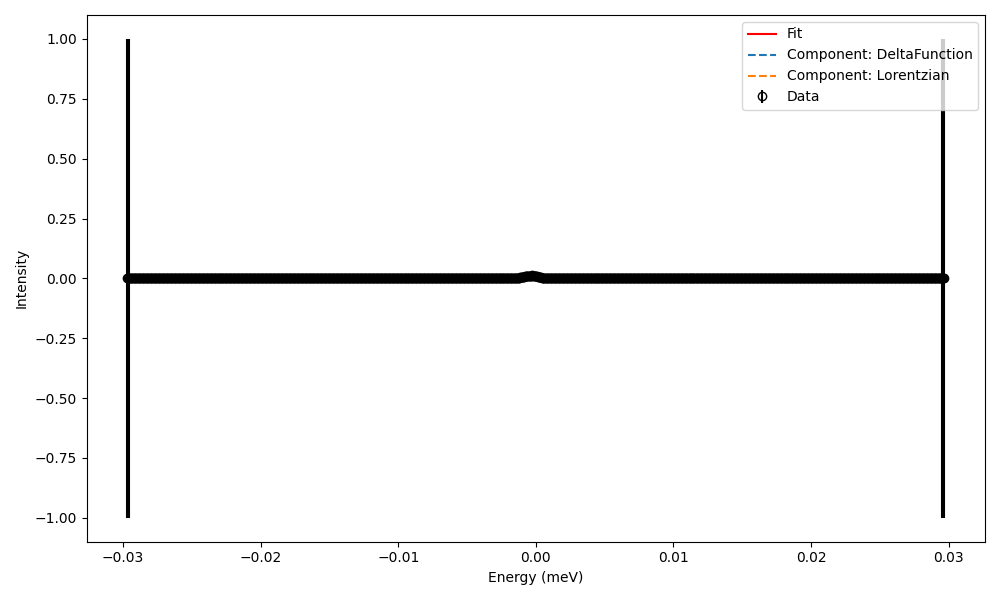

(0.0, 0.015)

In [21]:
fig=DataJob.analysis.plot_data_and_model(plot_individual_components=True)

# # Extract data
# x, y, e = DataJob.analysis._experiment.extract_xye_data(DataJob.analysis._experiment._data)

# # Start plot
# fig = plt.figure(figsize=(10, 6))
# # plt.errorbar(x, y, yerr=e, label='Data', color='black', marker='o', linestyle='None', markerfacecolor='none')

# # Compute and plot fit
# fit_y = DataJob.analysis.calculate_theory(x)
# plt.plot(x, fit_y, label='Fit', color='red')



fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.015)

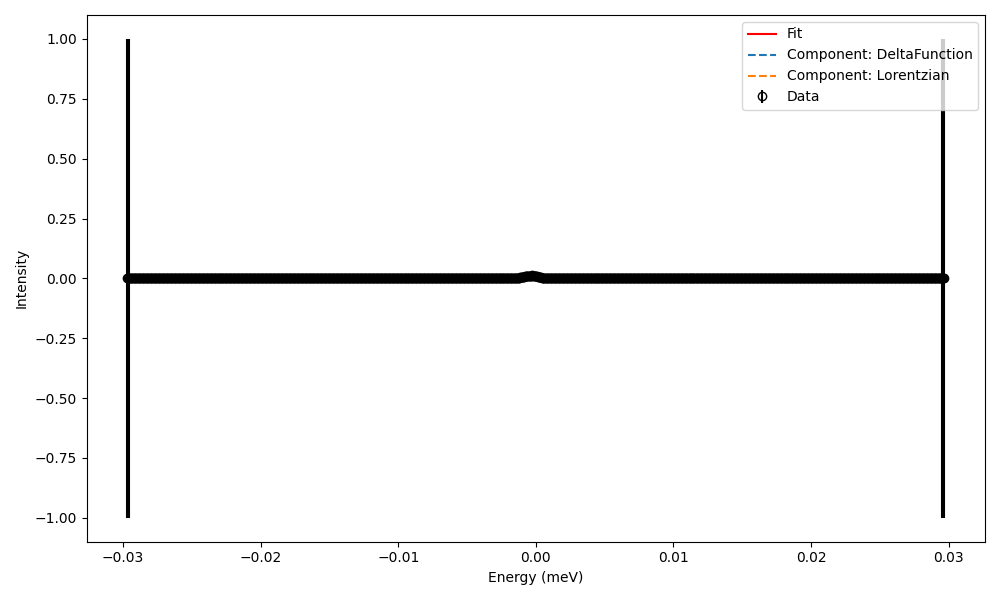

(0.0, 0.015)

In [22]:
DataJob.fit()
fig=DataJob.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.015)

In [23]:
DataJob.analysis.get_fit_parameters()

[<Parameter 'DeltaFunctionarea': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentzianarea': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentzianwidth': 0.0028 ± 0.0001 meV, bounds=[0.0:inf]>,
 <Parameter 'Polynomial_c0': 0.0002 ± 0.0000, bounds=[-inf:inf]>,
 <Parameter 'offset': -0.0004 ± 0.0000 meV, bounds=[-inf:inf]>]

In [24]:
DataJob.analysis.get_parameters()

[<Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'DeltaFunctionarea': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'DeltaFunctioncenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianarea': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0028 ± 0.0001 meV, bounds=[0.0:inf]>,
 <Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianarea': 0.9201 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'Gaussiancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianwidth': 0.0004 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'Lorentzianarea': 0.0799 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0005 meV (fixed), bounds=[0.0:inf]>,
 <Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Polynomial_c

(0.0, 100.0)

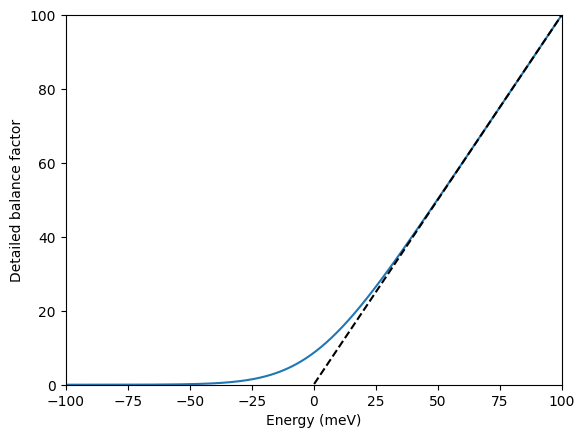

In [2]:
from easydynamics.utils import detailed_balance_factor
import numpy as np
x=np.linspace(-1000,1000,10000)
y=detailed_balance_factor(x, 100)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x, y)
plt.xlim(-100, 100)

plt.plot(x,x,linestyle='--', color='black')
plt.xlabel('Energy (meV)')
plt.ylabel('Detailed balance factor')
plt.ylim(0,100)


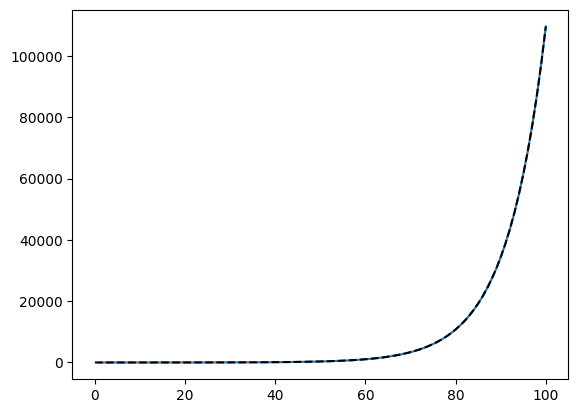

In [5]:
x1=np.linspace(0,100,101)
x2=-x1
y1=detailed_balance_factor(x1, 100)
y2=detailed_balance_factor(x2, 100)

plt.figure()
plt.plot(x1, y1/y2)

expected=np.exp(x1/(100*8.617333262145e-2))
plt.plot(x1, expected, linestyle='--', color='black')